# Performing Feature Engineering and Feature Selection

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,7)
import seaborn as sns

In [6]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
average_montly_hours_arr = df.average_montly_hours.values

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

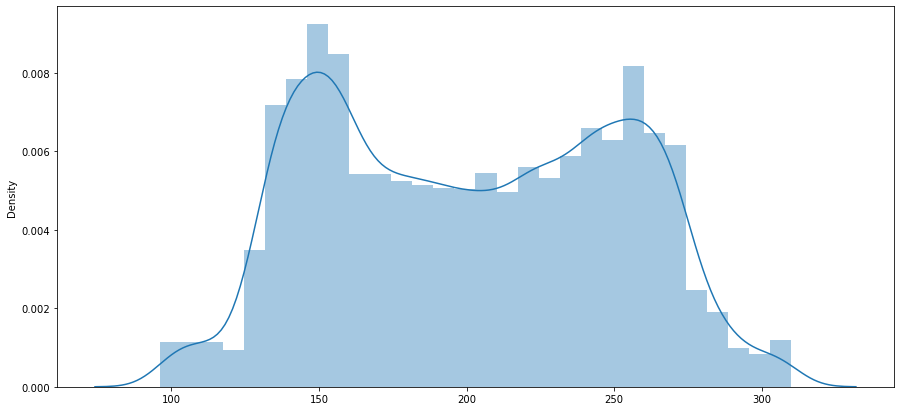

In [11]:
sns.distplot(average_montly_hours_arr)

In [20]:
df.average_montly_hours.median()

200.0

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

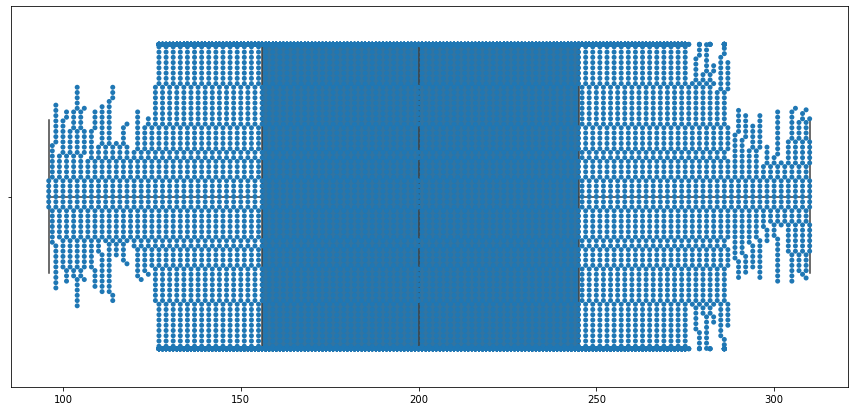

In [23]:
sns.boxplot(average_montly_hours_arr)
sns.swarmplot(average_montly_hours_arr)

### Performing feature selcetion. 
Use correlation metrix with heatmaps to determine which feature to use in the clasfication model. 

In [25]:
per_feature_selection=df.corr()

<AxesSubplot:>

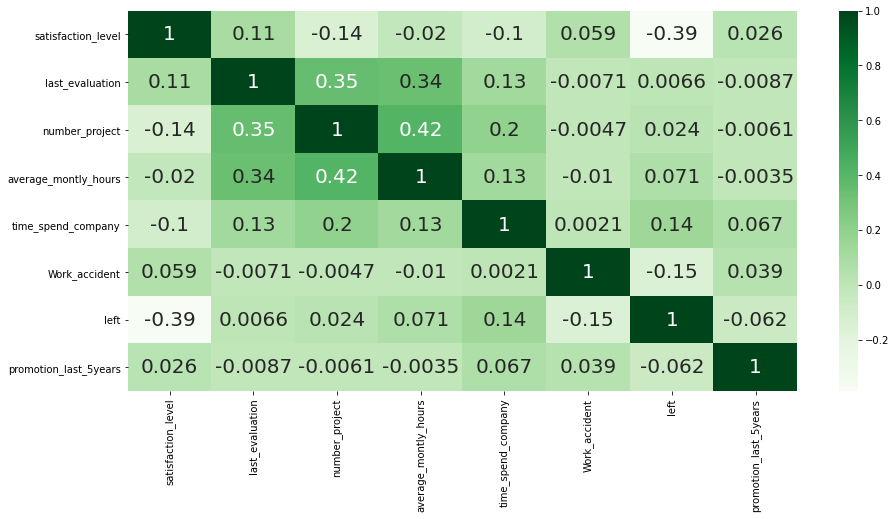

In [30]:
sns.heatmap(per_feature_selection,
           annot = True,
           annot_kws=({'size':20}),
           cmap ="Greens")

<AxesSubplot:xlabel='average_montly_hours', ylabel='left'>

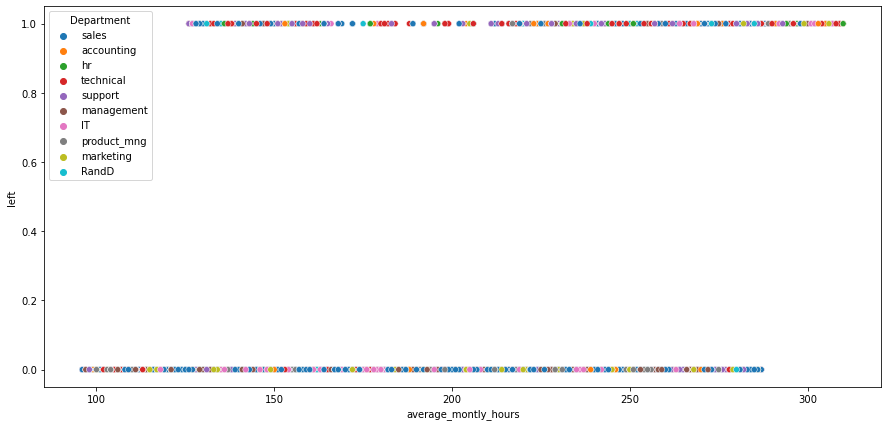

In [32]:
sns.scatterplot(x="average_montly_hours", y="left", data = df, ci =False, hue="Department")

In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

##### Based on the correlation matrix the following features do not have impact on the model:
satisfaction_level
last_evaluation
Work_accident
promotion_last_5years

###### Feature selection on categorical data. 
The visualization of using sns show that departments do not have an impact on whether an employee leaves or not

In [34]:
df_after_selection = df.drop(['satisfaction_level', 'last_evaluation','Work_accident','promotion_last_5years', 'Department'], axis = 1)

In [35]:
df_after_selection.head()

,number_project,average_montly_hours,time_spend_company,left,salary
0,2,157,3,1,low
1,5,262,6,1,medium
2,7,272,4,1,medium
3,5,223,5,1,low
4,2,159,3,1,low


In [36]:
salary_dummies =pd.get_dummies(df.salary)
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [40]:
df_final=pd.concat([df_after_selection, salary_dummies], axis = 1)
df_final.head()

,number_project,average_montly_hours,time_spend_company,left,salary,high,low,medium
0,2,157,3,1,low,0,1,0
1,5,262,6,1,medium,0,0,1
2,7,272,4,1,medium,0,0,1
3,5,223,5,1,low,0,1,0
4,2,159,3,1,low,0,1,0
